## Import Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image  import  load_img, ImageDataGenerator
from PIL import Image

## Check the GPU

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

##Check the GPU
if tf.config.experimental.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("Using CPU")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9428324341026525063
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1733715559
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7364888663163491303
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
Using GPU


## Import dataset

In [3]:
imgSize = 100
BatchSize = 32
datagen = ImageDataGenerator(rotation_range=10,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)
print("import image for training: ")
train_data = datagen.flow_from_directory('dataset path/train',
                                         target_size=(imgSize, imgSize),
                                         batch_size=BatchSize,
                                         class_mode='categorical',
                                         subset='training')
print("\nimport image for validation: ")
valid_data = datagen.flow_from_directory('dataset path/train',
                                         target_size=(imgSize, imgSize),
                                         batch_size=BatchSize,
                                         class_mode='categorical',
                                         subset='validation')

print("\nimport image for test: ")

test_datagen = ImageDataGenerator()

test_data = test_datagen.flow_from_directory('dataset path/test',
                                             target_size=(imgSize, imgSize),
                                             class_mode='categorical',
                                             batch_size=50,
                                             shuffle=False)

import image for training: 
Found 24320 images belonging to 19 classes.

import image for validation: 
Found 6080 images belonging to 19 classes.

import image for test: 
Found 7600 images belonging to 19 classes.


## Display general data information

In [4]:
##show classes
print("classes: ",train_data.class_indices)
print("image_shape: " , train_data.image_shape)

classes:  {'class0[r]': 0, 'class10[rrc]': 1, 'class11[rrt]': 2, 'class12[rcc]': 3, 'class13[rct]': 4, 'class14[ccc]': 5, 'class15[cct]': 6, 'class16[ttt]': 7, 'class17[ttr]': 8, 'class18[ttc]': 9, 'class1[c]': 10, 'class2[t]': 11, 'class3[rr]': 12, 'class4[cc]': 13, 'class5[tt]': 14, 'class6[rc]': 15, 'class7[rt]': 16, 'class8[ct]': 17, 'class9[rrr]': 18}
image_shape:  (100, 100, 3)


## Dictionary of classes

In [5]:
class_name = {
    0 : 'class0[r]', 1 : 'class10[rrc]', 
    2 : 'class11[rrt]', 3 : 'class12[rcc]',
    4 : 'class13[rct]',5: 'class14[ccc]', 
    6 : 'class15[cct]', 7 : 'class16[ttt]',
    8 : 'class17[ttr]',
    9 : 'class18[ttc]',10 : 'class1[c]',
    11 : 'class2[t]', 12 : 'class3[rr]',
    13 : 'class4[cc]', 14 : 'class5[tt]',
    15 : 'class6[rc]', 16 : 'class7[rt]',
    17 : 'class8[ct]', 18 : 'class9[rrr]'
}

## Import Library for neural network

In [6]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPool2D  , GlobalAveragePooling2D
from keras.layers import Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Normalization

## Building a neural network model

In [7]:
model = Sequential()
model.add(Input((100,100,3)))
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(19,activation='softmax'))

## View the structure of the model

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                    

## Introducing the necessary functions

In [9]:
loss = tf.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam(learning_rate=0.001)
metric = tf.metrics.CategoricalAccuracy()
model.compile(loss=loss,optimizer=opt,metrics=[metric])

## Introducing the necessary functions to reduce the learning rate and stop fitting in time

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


earlystop = EarlyStopping(monitor='val_categorical_accuracy',
                             patience=5,
                             mode='auto',
                             verbose=1)

# reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy',
                             factor=0.3,
                             patience=5,
                             min_delta=0.001,
                             mode='auto',
                             verbose=1)

## Model fitting

In [11]:
fitmodel = model.fit(train_data,epochs=80,validation_data=valid_data,verbose=2,callbacks=[earlystop, reduce_lr])

Epoch 1/80
760/760 - 52s - loss: 1.5086 - categorical_accuracy: 0.4744 - val_loss: 0.6341 - val_categorical_accuracy: 0.7729 - lr: 0.0010 - 52s/epoch - 68ms/step
Epoch 2/80
760/760 - 48s - loss: 0.5607 - categorical_accuracy: 0.7983 - val_loss: 0.4054 - val_categorical_accuracy: 0.8622 - lr: 0.0010 - 48s/epoch - 63ms/step
Epoch 3/80
760/760 - 48s - loss: 0.3938 - categorical_accuracy: 0.8640 - val_loss: 0.3140 - val_categorical_accuracy: 0.8992 - lr: 0.0010 - 48s/epoch - 64ms/step
Epoch 4/80
760/760 - 47s - loss: 0.3190 - categorical_accuracy: 0.8922 - val_loss: 0.2838 - val_categorical_accuracy: 0.9041 - lr: 0.0010 - 47s/epoch - 62ms/step
Epoch 5/80
760/760 - 48s - loss: 0.2861 - categorical_accuracy: 0.9054 - val_loss: 0.2719 - val_categorical_accuracy: 0.9102 - lr: 0.0010 - 48s/epoch - 63ms/step
Epoch 6/80
760/760 - 47s - loss: 0.2607 - categorical_accuracy: 0.9173 - val_loss: 0.2711 - val_categorical_accuracy: 0.9128 - lr: 0.0010 - 47s/epoch - 61ms/step
Epoch 7/80
760/760 - 47s - l

## Model evaluation On Test Data

In [12]:
model.evaluate(test_data)

152/152 [==============================] - 15s 96ms/step - loss: 0.1033 - categorical_accuracy: 0.9676


[0.10326264053583145, 0.9676315784454346]

## See the necessary diagrams

152/152 - 2s - loss: 0.1033 - categorical_accuracy: 0.9676 - 2s/epoch - 16ms/step


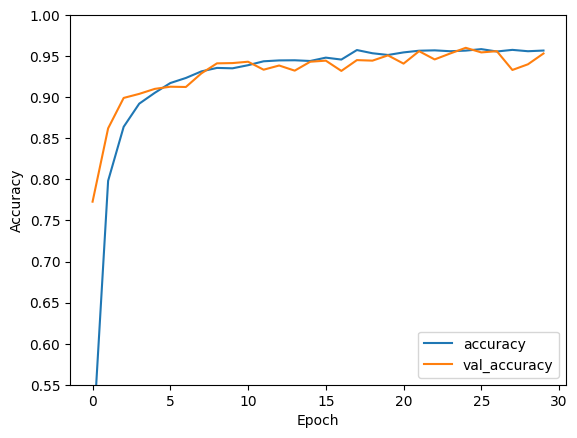

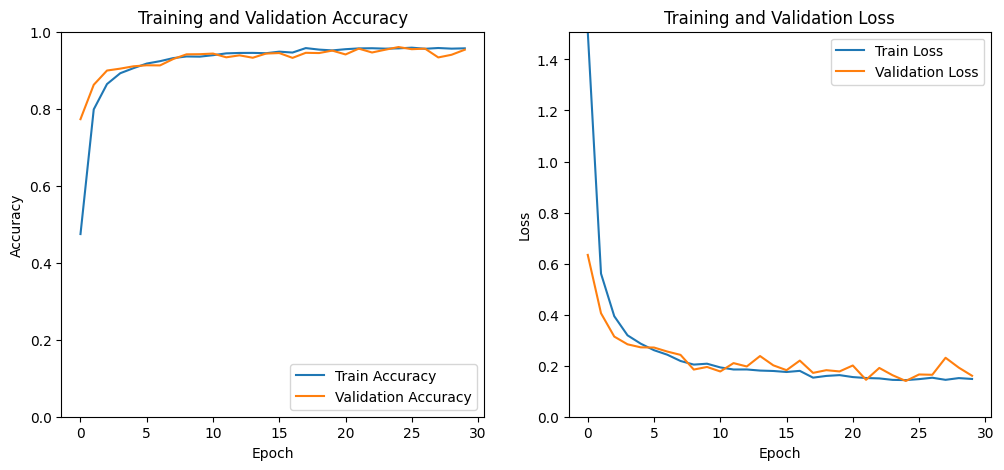

152/152 - 2s - loss: 0.1033 - categorical_accuracy: 0.9676 - 2s/epoch - 16ms/step

Test accuracy: 0.9676315784454346
Test loss: 0.10326264053583145


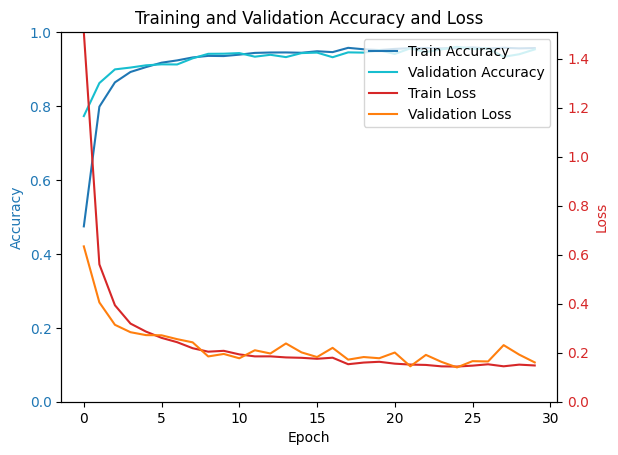

In [13]:
plt.plot(fitmodel.history['categorical_accuracy'], label='accuracy')
plt.plot(fitmodel.history['val_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.55, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, verbose=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fitmodel.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(fitmodel.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(fitmodel.history['loss'], label='Train Loss')
plt.plot(fitmodel.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(fitmodel.history['loss']), max(fitmodel.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

epochs = range(len(fitmodel.history['categorical_accuracy']))

fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(epochs, fitmodel.history['categorical_accuracy'], label='Train Accuracy', color='tab:blue')
ax1.plot(epochs, fitmodel.history['val_categorical_accuracy'], label='Validation Accuracy', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim([0, 1])

ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(epochs, fitmodel.history['loss'], label='Train Loss', color='tab:red')
ax2.plot(epochs, fitmodel.history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim([0, max(max(fitmodel.history['loss']), max(fitmodel.history['val_loss']))])

fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.title('Training and Validation Accuracy and Loss')
plt.show()

## Prediction of test data

In [14]:
y_p = model.predict(test_data)

152/152 [==============================] - 3s 17ms/step


## Viewing photos of the dataset and testing the correctness of the network

In [15]:
def show_image_with_prediction(image, true_label, predicted_label, class_names):
    plt.imshow(image.astype(np.uint8))
    plt.title(f'True: {class_names[np.argmax(true_label)]}, Pred: {class_names[np.argmax(predicted_label)]}')
    plt.axis('off')
    plt.show()

def get_image_by_global_index(global_index, test_data, model, class_names):
    batch_size = 50  
    batch_number = global_index // batch_size
    local_index = global_index % batch_size
    for i in range(batch_number + 1):
        test_images, test_labels = next(test_data)
    y_p = model.predict(test_images)
    show_image_with_prediction(test_images[local_index], test_labels[local_index], y_p[local_index], class_name)

## Insert index to check

2/2 [==============================] - 1s 447ms/step


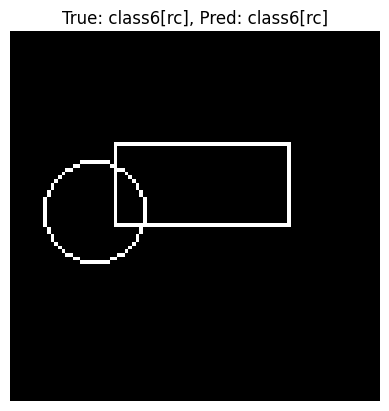

In [16]:
index = 6000
get_image_by_global_index(index, test_data, model, class_name)